<a href="https://colab.research.google.com/github/igor531205/applied_machine_learning_tasks/blob/hw2_hyperparameters_and_metrics_ml/hw2_hyperparameters_and_metrics_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

Standard libraries

In [1]:
import pandas as pd
import numpy as np
import typing

Visualization

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

Model preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

Model training

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, RFECV
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

Model evaluation

In [5]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, average_precision_score,\
  roc_auc_score, precision_score, recall_score, f1_score, top_k_accuracy_score, log_loss,\
  root_mean_squared_error, r2_score, mean_squared_error, d2_absolute_error_score, d2_pinball_score,\
  d2_tweedie_score, max_error, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score

Ignore warnings

In [6]:
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

Upload Vehicle dataset from GitHub

In [7]:
link = 'https://raw.githubusercontent.com/igor531205/applied_machine_learning_tasks/\
refs/heads/main/datasets/Vehicle%20dataset.csv'
vehicle_df=pd.read_csv(link, index_col=False)
vehicle_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


**Dataset information:** This dataset contains information about used cars.

**Columns:**

*   name: Model of the car
*   year: Manufacturing year
*   selling_price: Price at which the car is sold
*   km_driven: Total kilometers driven
*   fuel: Type of fuel used (Petrol, Diesel, etc.)
*   seller_type: Type of seller (Dealer, Individual)
*   transmission: Type of transmission (Manual, Automatic)
*   owner: Number of previous owners

**Source:** [Vehicle dataset](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho)

# Exploratory Data Analysis (EDA)

Function display histplot

In [8]:
def display_histplot(title: str, column: pd.DataFrame, color: typing.Any) -> None:
  '''Display histplot'''
  plt.figure(figsize=(10, 4))
  sns.histplot(column, kde=True, color=color)

  plt.title(title)
  plt.show()

Function display boxplot

In [9]:
def display_boxplot(title: str, hue_column: str, y_column: str, data: pd.DataFrame) -> None:
  '''Display boxplot'''
  plt.figure(figsize=(5, 2))
  sns.boxplot(x=hue_column, y=y_column, hue=hue_column, data=data)

  plt.title(title)
  plt.show()

Display the table dimensions (number of rows, number of columns)

In [10]:
vehicle_df.shape

(4340, 8)

Display description of the data in the DataFrame

In [11]:
vehicle_df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


Display information about the DataFrame

In [12]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Display number of unique values for each column

In [13]:
vehicle_df.nunique()

,0
name,1491
year,27
selling_price,445
km_driven,770
fuel,5
seller_type,3
transmission,2
owner,5


Display histplot for "Manufacturing year"

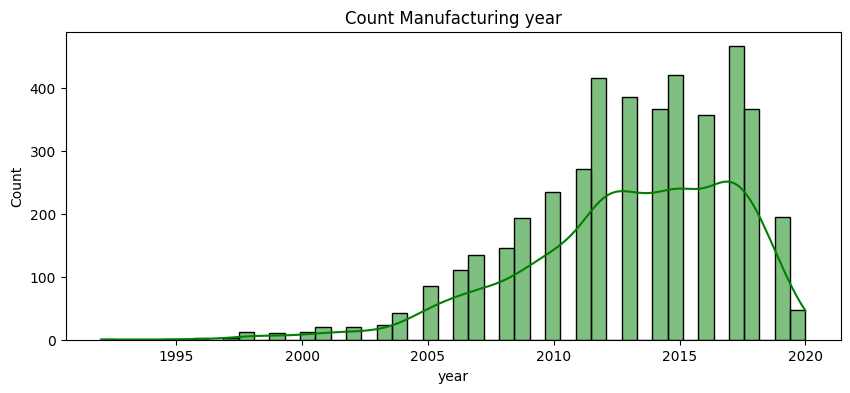

In [14]:
display_histplot(title='Count Manufacturing year', column=vehicle_df['year'], color='green')

Display histplot for "Total kilometers driven"

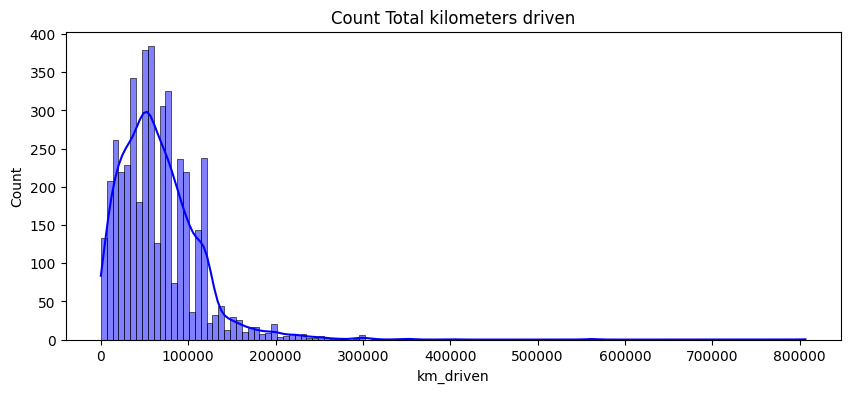

In [15]:
display_histplot(title='Count Total kilometers driven', column=vehicle_df['km_driven'], color='blue')

Display boxplot for "Total kilometers driven" with division into transmission

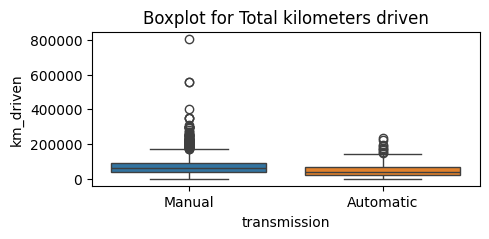

In [16]:
display_boxplot(
    title='Boxplot for Total kilometers driven',
    hue_column='transmission',
    y_column='km_driven',
    data=vehicle_df
)

Display sort pandas dataframe by column "Total kilometers driven"

In [17]:
vehicle_df.sort_values(by=['km_driven'], ascending=False).head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1243,Maruti Swift VXI BSIII,2009,250000,806599,Petrol,Dealer,Manual,First Owner
4184,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
525,Maruti SX4 S Cross DDiS 320 Delta,2016,665000,560000,Diesel,Dealer,Manual,First Owner
3679,Toyota Innova 2.5 G (Diesel) 7 Seater BS IV,2006,400000,400000,Diesel,Individual,Manual,Third Owner
2394,Toyota Innova 2.5 V Diesel 8-seater,2009,350000,350000,Diesel,Individual,Manual,First Owner
69,Chevrolet Tavera Neo LS B3 - 7(C) seats BSIII,2010,280000,350000,Diesel,Individual,Manual,Second Owner
3718,Toyota Innova 2.5 GX 8 STR BSIV,2009,420000,347089,Diesel,Dealer,Manual,First Owner
1674,Volkswagen Jetta 2.0 TDI Comfortline,2011,350000,312000,Diesel,Individual,Manual,Third Owner
1659,Toyota Innova 2.5 G (Diesel) 8 Seater BS IV,2006,229999,300000,Diesel,Individual,Manual,First Owner
3898,Tata Indica GLS BS IV,2010,90000,300000,Petrol,Individual,Manual,Third Owner


Display histplot for "Price at which the car is sold"

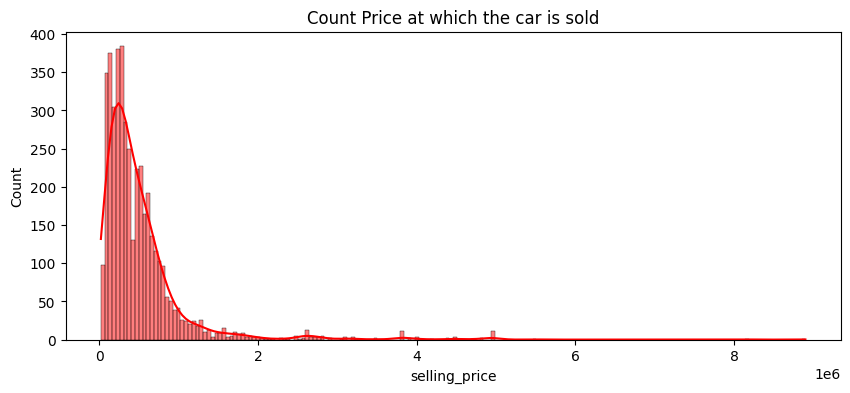

In [18]:
display_histplot(
    title='Count Price at which the car is sold',
    column=vehicle_df['selling_price'],
    color='red'
)

Display boxplot for "Price at which the car is sold" with division into transmission

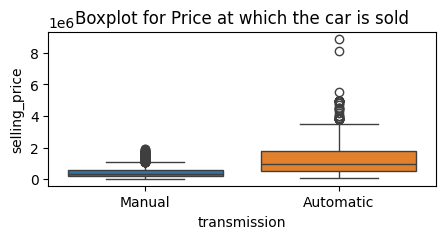

In [19]:
display_boxplot(
    title='Boxplot for Price at which the car is sold',
    hue_column='transmission',
    y_column='selling_price',
    data=vehicle_df
)

Display sort pandas dataframe by column "Price at which the car is sold"

In [20]:
vehicle_df.sort_values(by=['selling_price'], ascending=False).head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
3872,Audi RS7 2015-2019 Sportback Performance,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner
89,Mercedes-Benz S-Class S 350d Connoisseurs Edition,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
3969,Mercedes-Benz GLS 2016-2020 350d 4MATIC,2016,5500000,77350,Diesel,Dealer,Automatic,First Owner
2258,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
612,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
1836,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
555,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
2739,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
1023,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner
900,BMW X5 xDrive 30d xLine,2019,4950000,30000,Diesel,Dealer,Automatic,First Owner


Display a plot of two variables "Total kilometers driven" and "Price at which the car is sold"

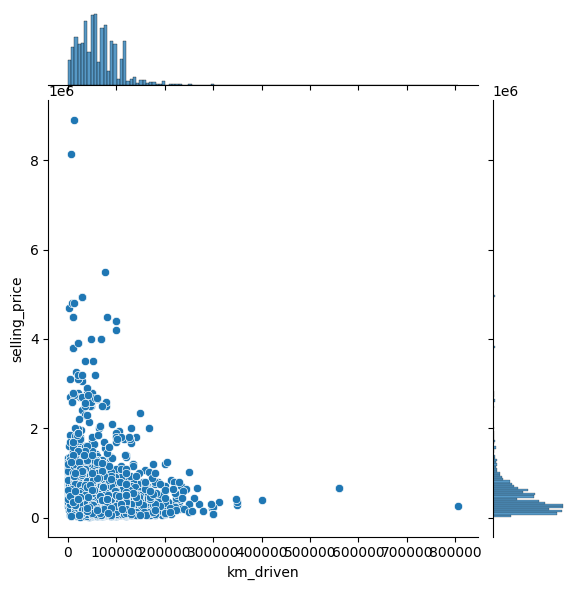

In [21]:
sns.jointplot(x='km_driven', y='selling_price', data=vehicle_df)
plt.show()

В колонке "Total kilometers driven" обнаружены выбросы, возможно связанные с капитальным ремонтом или заменой двигателя на старом автомобиле.

В колонке "Price at which the car is sold" обнаружены выбросы, возможно связанные с эксклюзивными моделями.

Remove rows with outliers

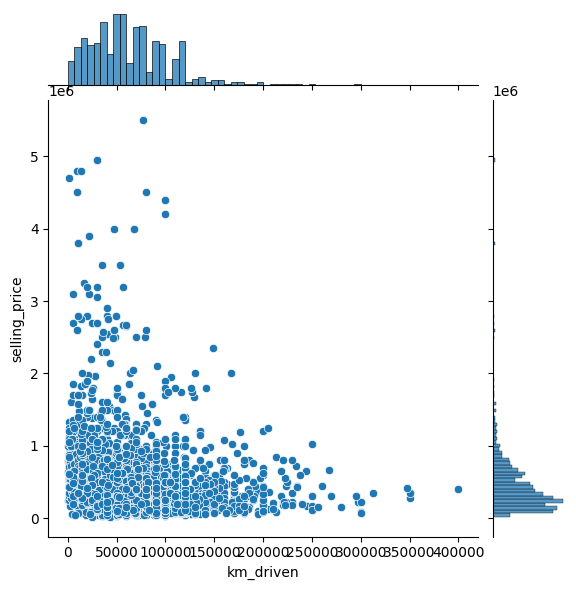

In [22]:
# Remove rows with outliers selling_price > 6000000
vehicle_df.drop(vehicle_df.loc[vehicle_df.selling_price > 6000000].index, inplace=True)

# Remove rows with outliers km_driven > 400000
vehicle_df.drop(vehicle_df.loc[vehicle_df.km_driven > 400000].index, inplace=True)

sns.jointplot(x='km_driven', y='selling_price', data=vehicle_df)
plt.show()

Create column "car_brand" from column "name" containing brand

In [23]:
# Create a list of car brands
car_brands = [
    'Ambassador', 'Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Datsun', 'Fiat', 'Force One', 'Ford', 'Honda',
    'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Mahindra', 'Maruti', 'Mercedes-Benz',
    'MG Hector', 'Mitsubishi', 'Nissan', 'Opel', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'
]

# Create column of "car_brand"
vehicle_df['car_brand'] = ''

# Fill in the "car_brand" column from the feature "name"
for car_brand in car_brands:
  name_with_car_brand = vehicle_df['name'].str.contains(car_brand, case=False, flags=0, na=None, regex=True)
  vehicle_df.loc[name_with_car_brand, 'car_brand'] = car_brand

# Check lines with missing values
print(f"Missing values in column 'car_brand' = {len(vehicle_df[vehicle_df['car_brand'] == ''])}")

Missing values in column 'car_brand' = 0


Drop the "name" column

In [24]:
vehicle_df.drop(columns=['name'], inplace=True)

vehicle_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,car_brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


Encode features into digital format

In [25]:
# Encode target labels with value between 0 and n_classes-1
label_encoder = LabelEncoder()

# Encode features into digital format
features = ['fuel', 'owner', 'car_brand', 'seller_type', 'transmission']
for feature in features:
  vehicle_df[feature] = label_encoder.fit_transform(vehicle_df[feature])

vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4335 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           4335 non-null   int64
 1   selling_price  4335 non-null   int64
 2   km_driven      4335 non-null   int64
 3   fuel           4335 non-null   int64
 4   seller_type    4335 non-null   int64
 5   transmission   4335 non-null   int64
 6   owner          4335 non-null   int64
 7   car_brand      4335 non-null   int64
dtypes: int64(8)
memory usage: 304.8 KB


Correlation matrix

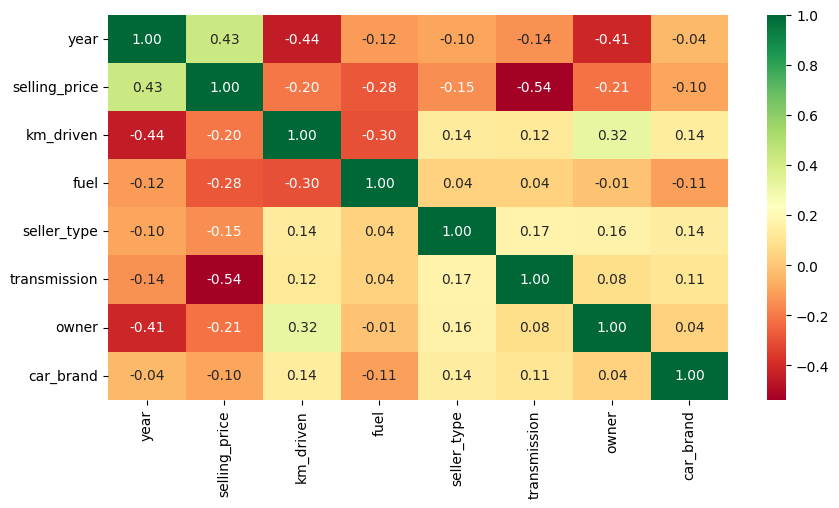

In [26]:
sns.heatmap(vehicle_df.corr(), annot=True, cmap='RdYlGn', fmt='.2f')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Признак "selling_price" коррелирует с признаком "year", т.к. чем старше автомобиль тем дешевле его стоимость.

Признак "selling_price" так же коррелирует с признаком "transmission", т.к. автомобили с коробкой автомат стоят дороже.

Признак "km_driven" коррелирует с признаком "year", т.к. чем старше автомобиль тем больше пробег.

Признак "owner" коррелирует с признаком "year", т.к. чем старше автомобиль тем больше у него потенциальных хозяев.

Отрицательная корреляция м/у признаками "km_driven" и "year" означает, что чем раньше год выпуска автомобиля тем больше пробег, а м/у "year" и "owner", что у более нового автомобиля меньше хозяев.



# Apply classification methods

Parameters models for Classification

In [27]:
models = {
    'Support Vector Machines': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1.0, 10, 100],
            'kernel': ['linear', 'sigmoid'],
            'degree': [3],
            'gamma': ['scale', 'auto'],
            'coef0': [0.0],
            'shrinking': [True],
            'probability': [False],
            'tol': [0.001, 0.0001],
            'cache_size': [200],
            'class_weight': [None],
            'verbose': [False],
            'max_iter': [-1],
            'decision_function_shape': ['ovr'],
            'break_ties': [False],
            'random_state': [None]
        }
    },
    'k-nearest neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto'],
            'leaf_size': [20, 30, 40],
            'p': [1, 2],
            'metric': ['minkowski'],
            'metric_params': [None],
            'n_jobs': [None]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 5],
            'min_weight_fraction_leaf': [0.0, 0.01, 0.1],
            'max_features': [None],
            'random_state': [None],
            'max_leaf_nodes': [None],
            'min_impurity_decrease': [0.0],
            'class_weight': [None],
            'ccp_alpha': [0.0, 0.01, 0.1],
            'monotonic_cst': [None]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'penalty': ['l2'],
            'dual': [False],
            'tol': [0.001, 0.0001, 0.00001],
            'C': [0.01, 0.1, 1.0, 5, 10],
            'fit_intercept': [True],
            'intercept_scaling': [1],
            'class_weight': [None],
            'random_state': [None],
            'solver': ['lbfgs', 'liblinear'],
            'max_iter': [100, 200, 500],
            'multi_class': ['deprecated'],
            'verbose': [0],
            'warm_start': [False],
            'n_jobs': [None],
            'l1_ratio': [None]
        }
    }
}

Prepare DataFrame for training Model

In [28]:
# Select the target feature "transmission"
y = vehicle_df['transmission'].copy()
X = vehicle_df.drop(columns=['transmission']).copy()

# Split DataFrame into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=11)

# Centering and scaling on each feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'X train shape {X_train_scaled.shape}')
print(f'X test  shape {X_test_scaled.shape}')
print(f'y train shape {y_train.shape}')
print(f'y test  shape {y_test.shape}')

X train shape (3034, 7)
X test  shape (1301, 7)
y train shape (3034,)
y test  shape (1301,)


Train models and compare models metrics

In [29]:
# Classification metrics https://scikit-learn.org/1.5/api/sklearn.metrics.html
metrics = {
    'accuracy': accuracy_score,
    'balanced_accuracy': balanced_accuracy_score,
    'average_precision': average_precision_score,
    'roc_auc': roc_auc_score,
    'precision': precision_score,
    'recall': recall_score,
    'f1': f1_score,
    'top_k_accuracy': top_k_accuracy_score,
    'log_loss': log_loss
}

for name, model in models.items():

    print(f'Model: {name}')

    # GridSearchCV https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GridSearchCV.html
    grid_search = GridSearchCV(
        estimator=model['model'], param_grid=model['params'], cv=5, refit=False, scoring='accuracy'
    )
    grid_search.fit(X_train_scaled, y_train)

    print(f'Model params: {grid_search.best_params_}')

    # Sets data-independent parameters
    grid_search_model = model['model'].set_params(**grid_search.best_params_)

    # SequentialFeatureSelector https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
    sfs = SequentialFeatureSelector(estimator=grid_search_model, cv=5, scoring='accuracy')
    sfs.fit(X_train_scaled, y_train)

    print(f'Optimal number of features: {sfs.n_features_to_select_}')

    # Use best features
    X_train_transform = sfs.transform(X_train_scaled)
    X_test_transform = sfs.transform(X_test_scaled)

    # Train and predict
    grid_search_model.fit(X_train_transform, y_train)
    preds = grid_search_model.predict(X_test_transform)

    # Compare model metrics
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, preds)
        print(f'{metric_name}: {metric_value:.3f}')

    print()

Model: Support Vector Machines
Model params: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Optimal number of features: 3
accuracy: 0.922
balanced_accuracy: 0.664
average_precision: 0.921
roc_auc: 0.664
precision: 0.921
recall: 0.997
f1: 0.958
top_k_accuracy: 1.000
log_loss: 2.826

Model: k-nearest neighbors
Model params: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Optimal number of features: 3
accuracy: 0.945
balanced_accuracy: 0.793
average_precision: 0.949
roc_auc: 0.793
precision: 0.950
recall: 0.990
f1: 0.970
top_k_accuracy: 1.000
log_loss: 1.967

Model: Decision Tree
Model params: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'm

Все модели показали хороший результат точности на тестовых данных.

Метод К-ближайших соседей показал лучший результат по метрике accuracy.

# Apply regression methods

Parameters models for Regression

In [30]:
models = {
    'Support Vector Machines': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'sigmoid'],
            'degree': [3],
            'gamma': ['scale', 'auto'],
            'coef0': [0.0],
            'tol': [0.001, 0.0001],
            'C': [0.1, 1.0, 10, 100],
            'epsilon': [0.1],
            'shrinking': [True],
            'cache_size': [2000],
            'verbose': [False],
            'max_iter': [-1]
        }
    },
    'k-nearest neighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto'],
            'leaf_size': [20, 30, 40],
            'p': [1, 2],
            'metric': ['minkowski'],
            'metric_params': [None],
            'n_jobs': [None]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['squared_error', 'absolute_error'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5],
            'min_samples_leaf': [1, 5],
            'min_weight_fraction_leaf': [0.0, 0.01, 0.1],
            'max_features': [None],
            'random_state': [None],
            'max_leaf_nodes': [None],
            'min_impurity_decrease': [0.0],
            'ccp_alpha': [0.0, 0.01, 0.1],
            'monotonic_cst': [None]
        }
    },
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
            'copy_X': [True, False],
            'n_jobs': [None],
            'positive': [False, True]
        }
    }
}

Prepare DataFrame for training Model

In [31]:
# Select the target feature "selling_price"
y = vehicle_df['selling_price'].copy()
X = vehicle_df.drop(columns=['selling_price']).copy()

# Split DataFrame into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=11)

# Centering and scaling on each feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'X train shape {X_train_scaled.shape}')
print(f'X test  shape {X_test_scaled.shape}')
print(f'y train shape {y_train.shape}')
print(f'y test  shape {y_test.shape}')

X train shape (3034, 7)
X test  shape (1301, 7)
y train shape (3034,)
y test  shape (1301,)


Train models and compare models score

In [32]:
# Regression metrics https://scikit-learn.org/1.5/api/sklearn.metrics.html
metrics = {
    'rmse': root_mean_squared_error,
    'mse': mean_squared_error,
    'd2_abs_error': d2_absolute_error_score,
    'd2_pinball': d2_pinball_score,
    'd2_tweedie_score': d2_tweedie_score,
    'max_error': max_error,
    'mean_abs_error': mean_absolute_error,
    'mean_abs_perc_error': mean_absolute_percentage_error,
    'explained_variance': explained_variance_score
}

for name, model in models.items():

    print(f'Model: {name}')

    # GridSearchCV https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.GridSearchCV.html
    grid_search = GridSearchCV(
        estimator=model['model'], param_grid=model['params'], cv=5, refit=False, scoring='neg_root_mean_squared_error'
    )
    grid_search.fit(X_train_scaled, y_train)

    print(f'Model params: {grid_search.best_params_}')

    # Sets data-independent parameters
    grid_search_model = model['model'].set_params(**grid_search.best_params_)

    # SequentialFeatureSelector https://scikit-learn.org/1.5/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html
    sfs = SequentialFeatureSelector(estimator=grid_search_model, cv=5, scoring='neg_root_mean_squared_error')
    sfs.fit(X_train_scaled, y_train)

    print(f'Optimal number of features: {sfs.n_features_to_select_}')

    # Use best features
    X_train_transform = sfs.transform(X_train_scaled)
    X_test_transform = sfs.transform(X_test_scaled)

    # Train and predict
    grid_search_model.fit(X_train_transform, y_train)
    preds = grid_search_model.predict(X_test_transform)

    # Compare model metrics
    for metric_name, metric_func in metrics.items():
        metric_value = metric_func(y_test, preds)
        print(f'{metric_name}: {metric_value:.3f}')

    print()

Model: Support Vector Machines
Model params: {'C': 100, 'cache_size': 2000, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Optimal number of features: 3
rmse: 533256.420
mse: 284362409496.063
d2_abs_error: 0.228
d2_pinball: 0.228
d2_tweedie_score: 0.169
max_error: 4871884.593
mean_abs_error: 235129.272
mean_abs_perc_error: 0.504
explained_variance: 0.217

Model: k-nearest neighbors
Model params: {'algorithm': 'auto', 'leaf_size': 40, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
Optimal number of features: 3
rmse: 298613.967
mse: 89170301509.960
d2_abs_error: 0.481
d2_pinball: 0.481
d2_tweedie_score: 0.739
max_error: 4926559.233
mean_abs_error: 158170.017
mean_abs_perc_error: 0.395
explained_variance: 0.740

Model: Decision Tree
Model params: {'ccp_alpha': 0.0, 'criterion': 'absolute_error', 'max_depth': 20, 'max_features

Метод К-ближайших соседей показал лучший результат по метрике rmse.

Методы классификации хорошо справились с предсказанием коробки передач в автомобилях.
Методы регрессии справились с задачей хуже, возможно это связано с тем, что для точной оценки стоимости автомобиля нужно больше данных о состоянии отдельных элементов автомобиля.